## This is the 2-layer neural network notebook for ECE C147/C247 Homework #3

Please follow the notebook linearly to implement a two layer neural network.

Please print out the notebook entirely when completed.

The goal of this notebook is to give you experience with training a two layer neural network.

In [1]:
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass. Make sure to read the description of TwoLayerNet class in neural_net.py file , understand the architecture and initializations

In [2]:
from nndl.neural_net import TwoLayerNet

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [4]:
## Implement the forward pass of the neural network.
## See the loss() method in TwoLayerNet class for the same

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.381231233889892e-08


### Forward pass loss

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.071696123862817

# should be very small, we get < 1e-12
print("Loss:",loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Loss: 1.071696123862817
Difference between your loss and correct loss:
0.0


### Backward pass

Implements the backwards pass of the neural network.  Check your gradients with the gradient check utilities provided.

In [6]:
from utils.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 1.839130104417909e-10
W2 max relative error: 2.9632227682005116e-10
W1 max relative error: 1.2832823337649917e-09
b1 max relative error: 3.172680092703762e-09


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the softmax and SVM.

Final training loss:  0.014497864587765875


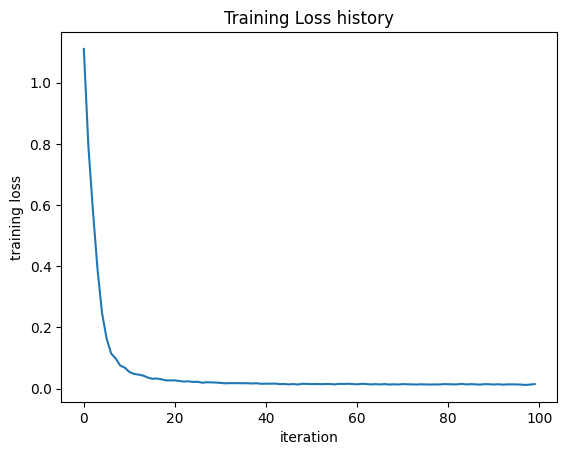

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [8]:
from utils.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 28-29%.

In [9]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 2.302757518613176
iteration 100 / 1000: loss 2.302120159207236
iteration 200 / 1000: loss 2.2956136007408703
iteration 300 / 1000: loss 2.2518259043164135
iteration 400 / 1000: loss 2.188995235046776
iteration 500 / 1000: loss 2.1162527791897747
iteration 600 / 1000: loss 2.064670827698217
iteration 700 / 1000: loss 1.9901688623083942
iteration 800 / 1000: loss 2.002827640124685
iteration 900 / 1000: loss 1.9465176817856495
Validation accuracy:  0.283


## Questions:

The training accuracy isn't great.  

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?


In [55]:
stats['train_acc_history']

[np.float64(0.095),
 np.float64(0.15),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.315)]

In [56]:
print(stats.keys())

dict_keys(['loss_history', 'train_acc_history', 'val_acc_history'])


Text(0, 0.5, 'Loss')

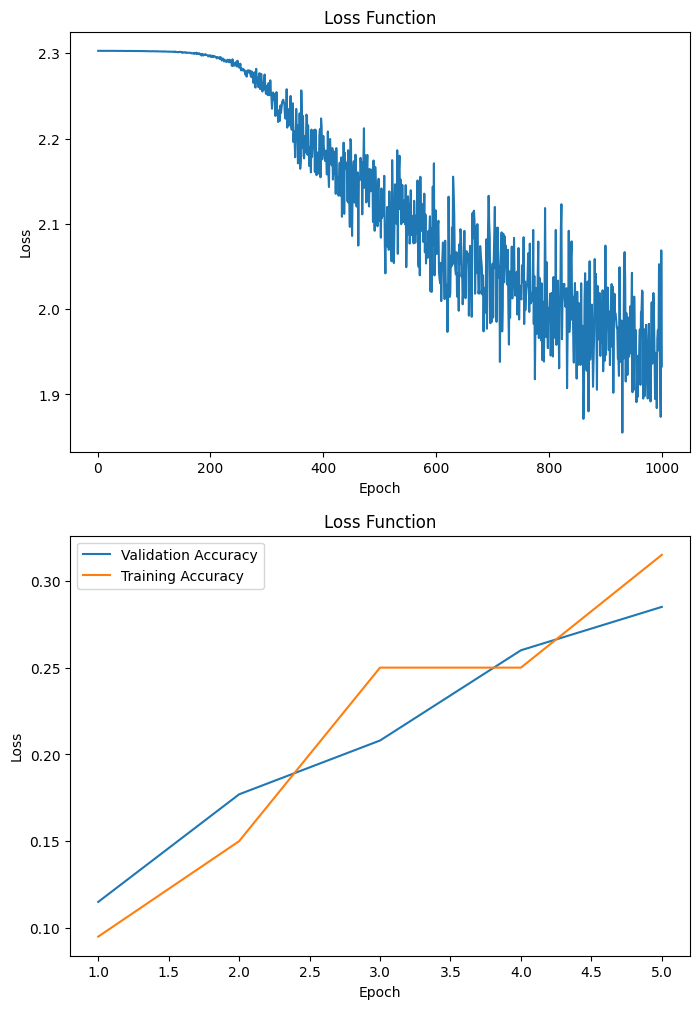

In [57]:
# ================================================================ #
# YOUR CODE HERE:
#   Do some debugging to gain some insight into why the optimization
#   isn't great.
# ================================================================ #

# Plot the loss function and train / validation accuracies
loss_epochs = np.arange(1, len(stats['loss_history'])+1)
val_epochs = np.arange(1, len(stats['val_acc_history'])+1)

plt.figure(figsize=(8, 12))

#Training/Validation Accuracy
plt.subplot(2,1,1)
plt.plot(loss_epochs, stats['loss_history'], label='Training Loss')
plt.title("Loss Function")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(2,1,2)
plt.plot(val_epochs, stats['val_acc_history'], label='Validation Accuracy')
plt.plot(val_epochs, stats['train_acc_history'], label="Training Accuracy")
plt.legend()
plt.title("Loss Function")
plt.xlabel("Epoch")
plt.ylabel("Loss")


# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Answers:

(1) The loss is decreasing overall but fluctuates heavily, indicating potential instability during training. These fluctuations may be caused by a very high learning rate, causing the model to bounce around the optimal values instead of converging smoothly. Also, both the training and validation accuracies are pretty low, indicating that the model might not be complex or not optimized enough for the problem. 

(2) We can adjust the learning rate (lower it) to stabilize training and smoothen the loss curve. Lower learning rates often lead to better (albeit not faster) convergence. Could also add more layers to the network, or more units to each layer - increasing the model complexity and expressive power. We can also train for a longer period (more epochs) to allow the loss to plateau (first graph shows that the loss is continuing to decrease until the final epochs).

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

In [10]:
best_net = TwoLayerNet(input_size, hidden_size, num_classes) # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 50% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 28%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #

# Train the network
stats = best_net.train(X_train, y_train, X_val, y_val,
            num_iters=2500, batch_size=400,
            learning_rate=2e-3, learning_rate_decay=0.95,
            reg=0.3, verbose=True)

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 2500: loss 2.302800736026662
iteration 100 / 2500: loss 1.7397917916168866
iteration 200 / 2500: loss 1.6966005318271262
iteration 300 / 2500: loss 1.576449488105527
iteration 400 / 2500: loss 1.558222626928295
iteration 500 / 2500: loss 1.5429080408122426
iteration 600 / 2500: loss 1.5727776896163046
iteration 700 / 2500: loss 1.482869749024904
iteration 800 / 2500: loss 1.45042382742387
iteration 900 / 2500: loss 1.4166543238827565
iteration 1000 / 2500: loss 1.4729456555353906
iteration 1100 / 2500: loss 1.4472974593650867
iteration 1200 / 2500: loss 1.391245346233071
iteration 1300 / 2500: loss 1.4217417841361761
iteration 1400 / 2500: loss 1.3406598523086257
iteration 1500 / 2500: loss 1.3391334368600307
iteration 1600 / 2500: loss 1.4478652951161104
iteration 1700 / 2500: loss 1.4242363691199675
iteration 1800 / 2500: loss 1.3801116345849287
iteration 1900 / 2500: loss 1.480285401173437
iteration 2000 / 2500: loss 1.4523780601214915
iteration 2100 / 2500: loss 1.338

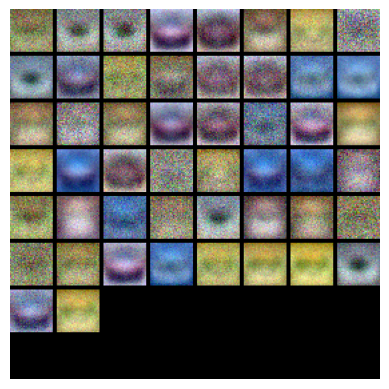

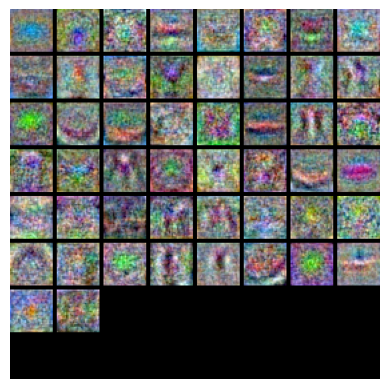

In [59]:
from utils.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

## Question:

(1) What differences do you see in the weights between the suboptimal net and the best net you arrived at?

## Answer:

(1) The weights of the best net that I arrived at are way more complex and varied, (colorful) and have a variety of different shapes and features. However, the weights of the suboptimal net have much lower complexity, and seem to  all be highlighting only certain features/angles of cars and other objects in the dataset. 

## Evaluate on test set 

In [11]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.495
